# COVID-19 Detection using Machine Learning

The SARS-CoV-2 (novel coronavirus) is responsible for the COVID-19 pandemic, an international health emergency. Since its initial discovery in Wuhan, China in December 2019, it has spread quickly throughout the world, causing a sizable number of infections and fatalities.

Breathing problem, fever, dry cough, sore throat, running nose, asthma, chronic lung disease, headache, heart disease, diabetes, hyper tension, fatigue, and gastrointestinal issues are some of the mild to severe COVID-19 indications and symptoms. More severe symptoms, such as pneumonia, acute respiratory distress syndrome (ARDS), or multi-organ failure, may also occur in certain people.

The current COVID-19 treatments are mostly supportive in nature and focus on symptom relief and complication management. Despite the fact that a variety of vaccinations have been created and are being disseminated globally, there is still no known treatment for COVID-19. Additionally, corticosteroids have been used to treat severe respiratory symptoms, and antiviral medications such remdesivir have been demonstrated to reduce the length of sickness in some individuals.

As of January 2023, the World Health Organization (WHO) reported that the COVID-19 pandemic had killed 4 million people and caused over 150 million confirmed cases, having a significant negative impact on both world health and economies. And on 30 January 2023, a total of 13,168,935,724 vaccine doses have been administered. Early virus detection and diagnosis are essential for controlling the virus' spread and reducing the strain on healthcare systems.

With the virus spreading quickly and infecting millions of people worldwide, the COVID-19 pandemic has brought about an unparalleled global health crisis, stressing the necessity for effective and trustworthy tools for early detection and rapid diagnosis. In order to stop the spread of COVID-19 and lessen the strain on healthcare systems, early and precise case diagnosis is essential. 

In [19]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingCVClassifier

In [2]:
# Import dataset 
# Link : https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence

dataset = pd.read_csv('/kaggle/input/symptoms-and-covid-presence/Covid Dataset.csv')
dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
# Missing data

missing_values = dataset.isnull().sum() 

value_result = {
    'missing_values ':missing_values
}
missing_pd = pd.DataFrame(value_result)
missing_pd

,missing_values
Breathing Problem,0
Fever,0
Dry Cough,0
Sore throat,0
Running Nose,0
Asthma,0
Chronic Lung Disease,0
Headache,0
Heart Disease,0
Diabetes,0


In [4]:
# Label encoding on the categorical columns

encoded_dataset = dataset.copy()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the dataset
for column in encoded_dataset.columns:
    # Check if the column is of object or categorical type
    if encoded_dataset[column].dtype == object:
        # Apply label encoding to the column
        encoded_dataset[column] = label_encoder.fit_transform(encoded_dataset[column])

encoded_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


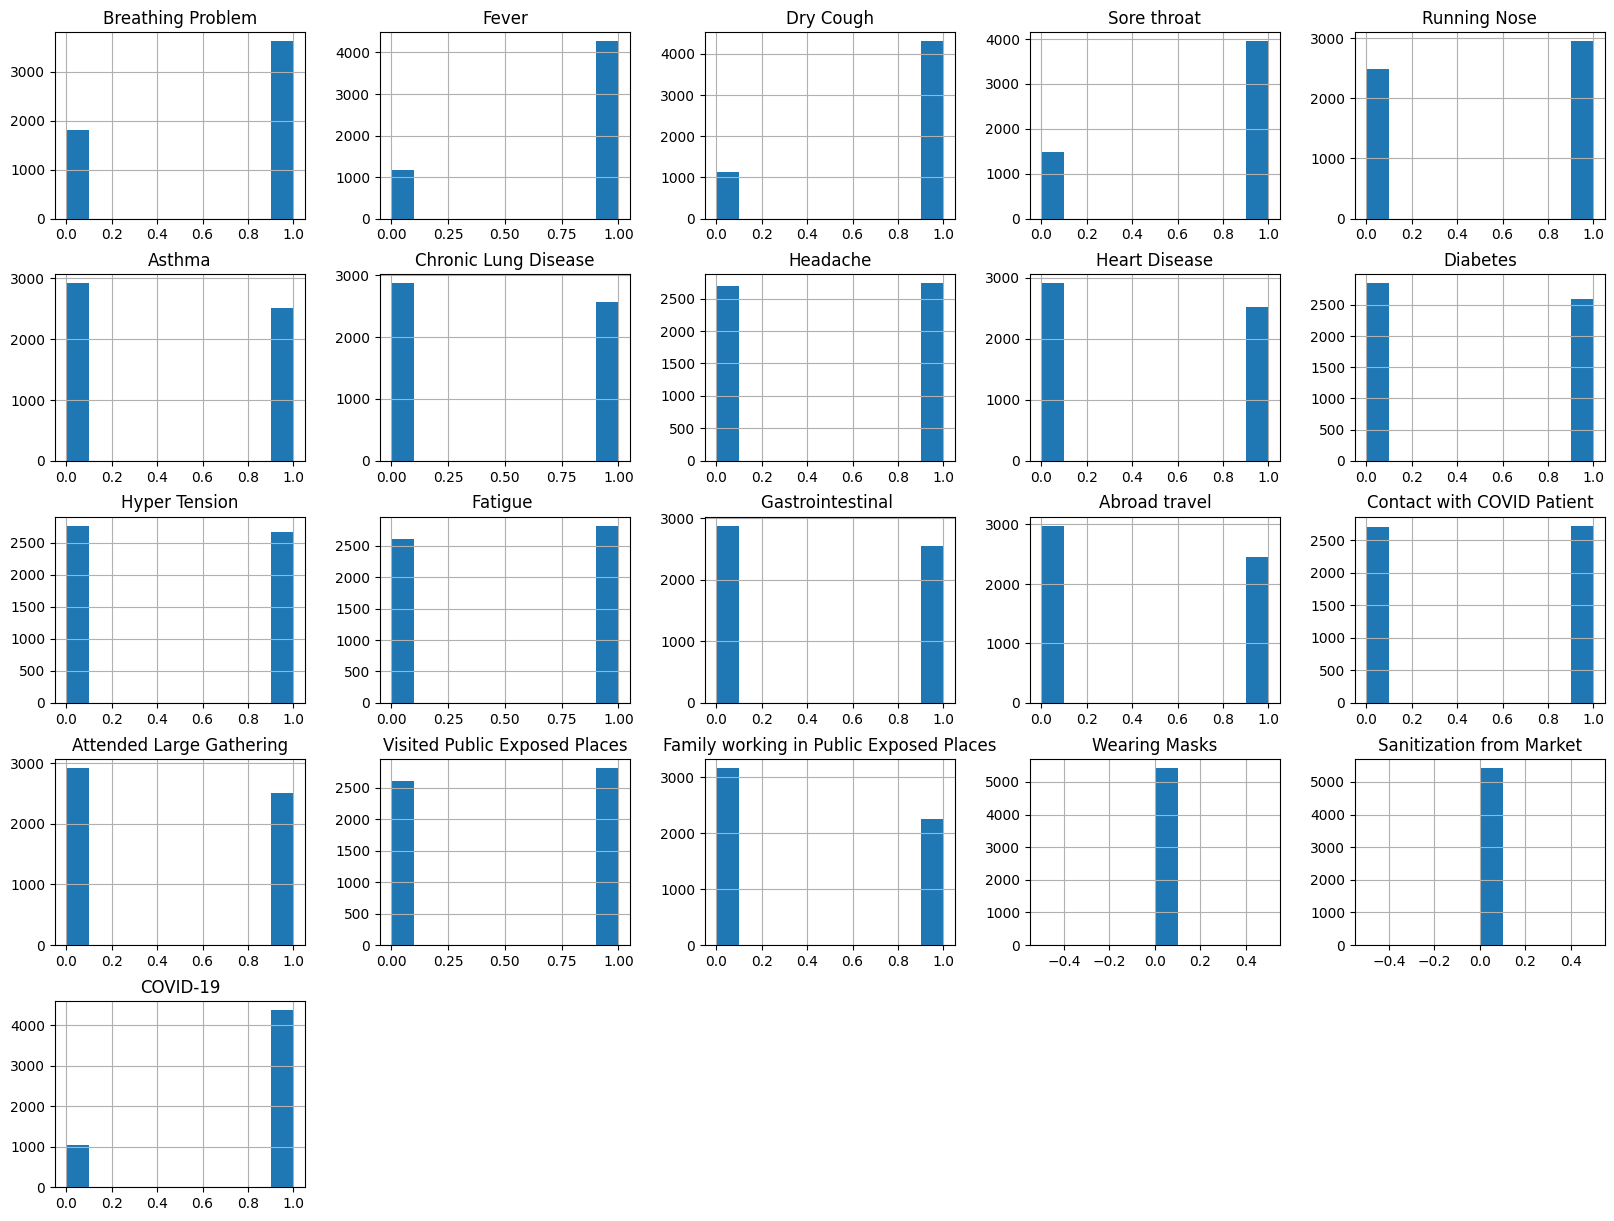

In [5]:
# Visualize the dataset 

encoded_dataset.hist(figsize=(20,15));

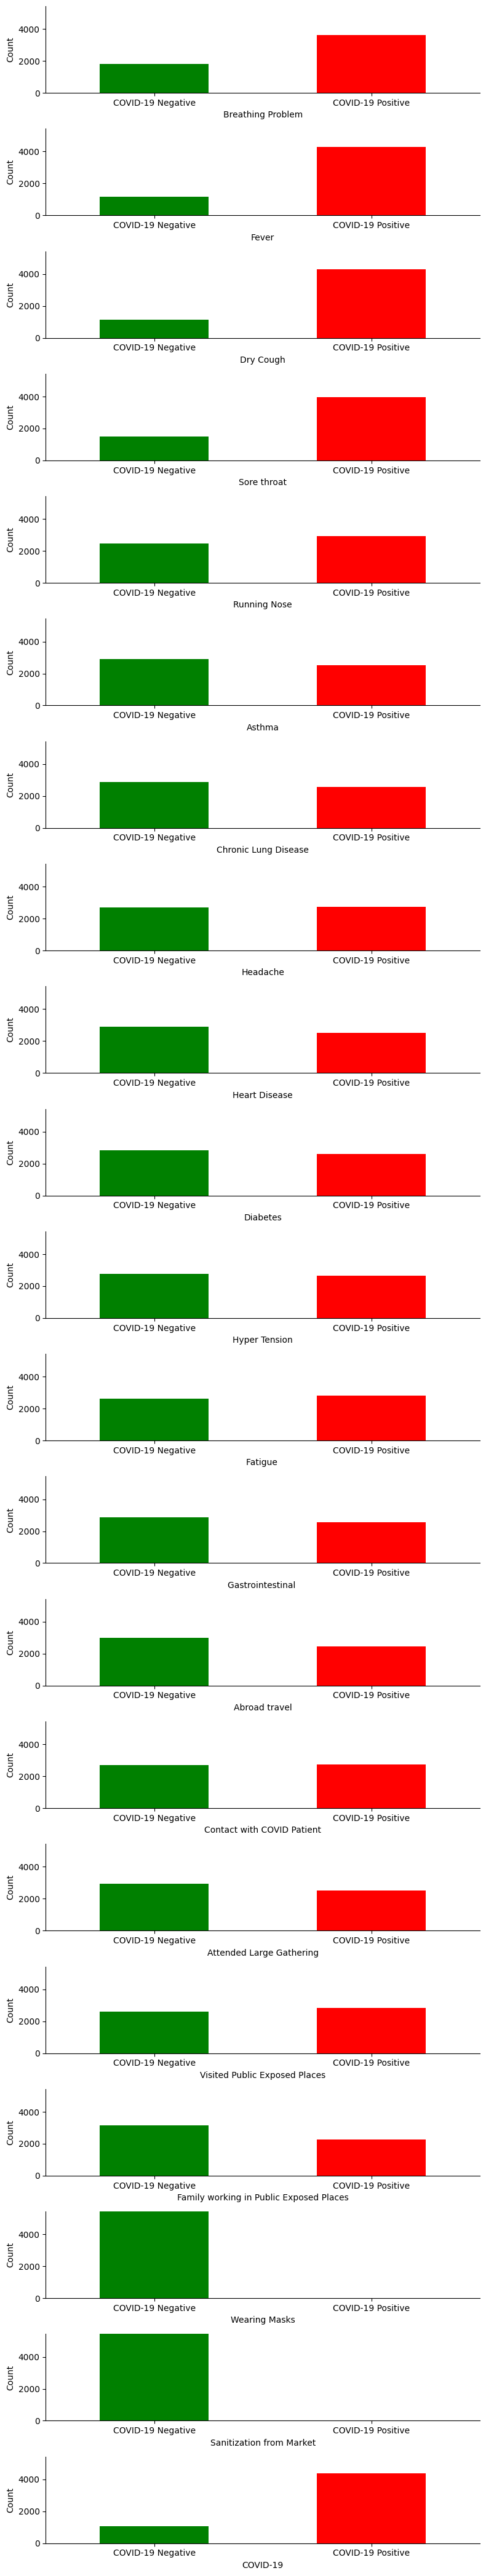

In [6]:
# Understanding the dataset visually

# Calculate the count of 0s and 1s in each column
value_counts = dataset.apply(pd.Series.value_counts)

# Generate bar plots for all columns
fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=1, figsize=(8, 2 * len(dataset.columns)))
for i, column in enumerate(dataset.columns):
    ax = axes[i]
    value_counts[column].plot(kind='bar', ax=ax, color=['green', 'red'])
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(['COVID-19 Negative', 'COVID-19 Positive'], rotation=0)
    ax.set_ylim([0, len(dataset)])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [7]:
# Train-Test split

x = encoded_dataset.drop('COVID-19',axis=1)
y = encoded_dataset['COVID-19']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Logistic Regression
Logistic regression is a statistical method used to model the relationship between a binary dependent variable and one or more independent variables. It estimates the probability of occurrence of an event by fitting the data to a logistic function that transforms a linear combination of the independent variables.

In [8]:
# Creating an instance of Logistic Regression
model_logreg = LogisticRegression()

# Train the model
model_logreg.fit(x_train, y_train)

# Make predictions on the test set
model_logreg_predictions = model_logreg.predict(x_test)

# Evaluate the model
model_logreg_accuracy = accuracy_score(y_test, model_logreg_predictions)
print("Logistic Regression Accuracy:", model_logreg_accuracy)

Logistic Regression Accuracy: 0.9733210671573137


## Random Forest Classifier
Random forest classifier is a type of ensemble learning method in machine learning, where multiple decision trees are trained on different subsets of the training data and their results are combined to make the final prediction. This method reduces overfitting and increases the accuracy of predictions.

In [9]:
# Creating an instance of Random Forest Classifier
model_rf_classifier = RandomForestClassifier()

# Train the model
model_rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_rf_predictions = model_rf_classifier.predict(x_test)

# Evaluate the model
model_rf_accuracy = accuracy_score(y_test, model_rf_predictions)
print("Random Forest Classifier Accuracy:", model_rf_accuracy)

Random Forest Classifier Accuracy: 0.9862005519779209


## Descision Tree Classifier
A Decision Tree classifier is a type of supervised learning algorithm that is used for both classification and regression tasks. It creates a tree-like model of decisions and their possible consequences based on the input features, enabling the prediction of the target variable based on the values of the input features.

In [10]:
# Create=ing an instance of Decision Tree Classifier
model_dt_classifier = DecisionTreeClassifier()

# Train the model
model_dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_dt_predictions = model_dt_classifier.predict(x_test)

# Evaluate the model
model_dt_accuracy = accuracy_score(y_test, model_dt_predictions)
print("Decision Tree Accuracy:", model_dt_accuracy)

Decision Tree Accuracy: 0.9862005519779209


## Naive Bayes
Naive Bayes is a basic but powerful classification technique based on Bayes' theorem. It makes the "naive" assumption that all features are independent of one another. Based on the probabilities of a data point's features, it determines which class it is most likely to belong to, then it chooses that class. Naive Bayes is effective and frequently successful, particularly for text categorization problems.

In [11]:
# Creating an instance of Naive Bayes Classifier
model_nb_classifier = GaussianNB()

# Train the model
model_nb_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_nb_predictions = model_nb_classifier.predict(x_test)

# Evaluate the model
model_nb_accuracy = accuracy_score(y_test, model_nb_predictions)
print("Naive Bayes Accuracy:", model_nb_accuracy)

Naive Bayes Accuracy: 0.7424103035878565


## KNN Classifier
A supervised machine learning approach known as a KNN (k-nearest neighbours) Classifier provides a class label to a data point based on the majority class of its k nearest neighbours in the feature space. It is helpful for pattern identification and classification jobs since it is predicated on the idea that comparable cases are more likely to share the same class label.

In [12]:
# Creating an instance of KNN Classifier
model_knn_classifier = KNeighborsClassifier()

# Train the model
model_knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_knn_predictions = model_knn_classifier.predict(x_test)

# Evaluate the model
model_knn_accuracy = accuracy_score(y_test, model_knn_predictions)
print("KNN Classifier Accuracy:", model_knn_accuracy)

KNN Classifier Accuracy: 0.9825206991720331


## Support Vector Classifier
The Support Vector Classifier (SVC) is an advanced machine learning technique that is used for classification tasks. It seeks to discover the best hyperplane that separates various classes in the data by maximizing the margin between them. It works well in high-dimensional spaces and is capable of handling both linear and non-linear classification issues.

In [13]:
# Creating an instance of SVM
model_svm_classifier = SVC()

# Train the model
model_svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_svm_predictions = model_svm_classifier.predict(x_test)

# Evaluate the model
model_svm_accuracy = accuracy_score(y_test, model_svm_predictions)
print("SVM Accuracy:", model_svm_accuracy)

SVM Accuracy: 0.9862005519779209


## Multi Layer Perceptron Classifier
A neural network is a type of machine learning model inspired by the structure and function of biological neurons. It consists of multiple layers of artificial neurons that process and transform input data to generate output. Neural networks are commonly used for tasks such as classification, regression, and pattern recognition. Here we are using Multi-Layer Perceptron (MLP).

In [14]:
# Creating an instance of MLP Classifier
model_ann_classifier = MLPClassifier()

# Train the model
model_ann_classifier.fit(x_train, y_train)

# Make predictions on the test set
model_ann_predictions = model_ann_classifier.predict(x_test)

# Evaluate the model
model_ann_accuracy = accuracy_score(y_test, model_ann_predictions)
print("ANN Accuracy:", model_ann_accuracy)

ANN Accuracy: 0.9862005519779209


## Hybrid Model - Voting Classifier
EnsembleVoteClassifier is a meta-estimator that combines multiple individual machine learning classifiers to improve the overall prediction accuracy. It aggregates the predictions from each classifier using majority voting or weighted voting and produces a final prediction that is more robust and less prone to overfitting than any individual classifier.

In [15]:
# Creating the voting ensemble classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', model_logreg),
        ('rf', model_rf_classifier),
        ('dt', model_dt_classifier),
        ('svm', model_svm_classifier),
        ('knn', model_knn_classifier),
        ('ann', model_ann_classifier)
    ],
    # Voting strategy: Hard = majority of votes, Soft = highest average probability
    voting='hard'  
)

# Train the voting ensemble model
voting_classifier.fit(x_train, y_train)

# Make predictions on the test set using the voting ensemble model
ensemble_predictions = voting_classifier.predict(x_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Voting Classifier Model Accuracy:", ensemble_accuracy)

Voting Classifier Model Accuracy: 0.9862005519779209


## Hybrid Model - Stacking CV Classifier
StackingCVClassifier is a stacking ensemble method that combines multiple base classifiers and a meta-classifier to improve classification performance. It uses cross-validation to prevent overfitting and generates meta-features from the predictions of the base classifiers, which are then used as input for the meta-classifier.

In [16]:
# Base Models
base_models = [
    model_logreg,
    model_rf_classifier,
    model_dt_classifier,
    model_svm_classifier,
    model_knn_classifier,
    model_ann_classifier,
    voting_classifier
]

# Creating a meta-model
meta_model = voting_classifier 

# Creating a StackingCVClassifier instance
stacking_classifier = StackingCVClassifier(
    classifiers=base_models,
    meta_classifier=meta_model,    
    cv=StratifiedKFold(n_splits=10),
    verbose=1
)

# Train the model
stacking_classifier.fit(x_train, y_train)

# Make predictions on the test set using the model
stacking_predictions = stacking_classifier.predict(x_test)

# Evaluate the model
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Fitting 7 classifiers...
Fitting classifier1: logisticregression (1/7)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   49.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   54.0s finished


Stacking Classifier Accuracy: 0.9862005519779209


## **Stratified Sampling Validation**
StratifiedShuffleSplit is a method in scikit-learn that splits data into train and test sets while preserving the proportion of target variable classes. It randomly shuffles the data while ensuring each fold has equal proportion of target variable classes. It is useful for imbalanced datasets.

In [24]:
# Initializing K Folds
model_stratified_sampling = StratifiedShuffleSplit(n_splits=5, random_state=42)
models = [
    model_logreg,
    model_rf_classifier,
    model_dt_classifier,
    model_svm_classifier,
    model_knn_classifier,
    model_ann_classifier,
    voting_classifier,
    stacking_classifier
]

for model in models:
    for train_index, test_index in model_stratified_sampling.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train.values, y_train.values)
        accuracy = model.score(x_test, y_test)
        print(model, "accuracy: {:.3f}".format(accuracy))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


LogisticRegression() accuracy: 0.976
LogisticRegression() accuracy: 0.971
LogisticRegression() accuracy: 0.978
LogisticRegression() accuracy: 0.960
LogisticRegression() accuracy: 0.967


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier() accuracy: 0.982


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier() accuracy: 0.980


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier() accuracy: 0.983


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier() accuracy: 0.985


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

RandomForestClassifier() accuracy: 0.976
DecisionTreeClassifier() accuracy: 0.982
DecisionTreeClassifier() accuracy: 0.980
DecisionTreeClassifier() accuracy: 0.983
DecisionTreeClassifier() accuracy: 0.985
DecisionTreeClassifier() accuracy: 0.976


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVC() accuracy: 0.983
SVC() accuracy: 0.980


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVC() accuracy: 0.985
SVC() accuracy: 0.989


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


SVC() accuracy: 0.978
KNeighborsClassifier() accuracy: 0.982
KNeighborsClassifier() accuracy: 0.976
KNeighborsClassifier() accuracy: 0.983


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNeighborsClassifier() accuracy: 0.974
KNeighborsClassifier() accuracy: 0.965


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


MLPClassifier() accuracy: 0.978


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


MLPClassifier() accuracy: 0.980


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


MLPClassifier() accuracy: 0.985


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


MLPClassifier() accuracy: 0.985


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


MLPClassifier() accuracy: 0.976


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier())]) accuracy: 0.983


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier())]) accuracy: 0.980


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier())]) accuracy: 0.985


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier())]) accuracy: 0.985


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('ann', MLPClassifier())]) accuracy: 0.976
Fitting 7 classifiers...
Fitting classifier1: logisticregression (1/7)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   54.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packa

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(),
                                  DecisionTreeClassifier(), SVC(),
                                  KNeighborsClassifier(), MLPClassifier(),
                                  VotingClassifier(estimators=[('logreg',
                                                                LogisticRegression()),
                                                               ('rf',
                                                                RandomForestClassifier()),
                                                               ('dt',
                                                                DecisionTreeClassifier()),
                                                               ('svm', SVC()),
                                                               ('knn',
                                                                KNeighborsClassifier()),
                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packa

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(),
                                  DecisionTreeClassifier(), SVC(),
                                  KNeighborsClassifier(), MLPClassifier(),
                                  VotingClassifier(estimators=[('logreg',
                                                                LogisticRegression()),
                                                               ('rf',
                                                                RandomForestClassifier()),
                                                               ('dt',
                                                                DecisionTreeClassifier()),
                                                               ('svm', SVC()),
                                                               ('knn',
                                                                KNeighborsClassifier()),
                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(),
                                  DecisionTreeClassifier(), SVC(),
                                  KNeighborsClassifier(), MLPClassifier(),
                                  VotingClassifier(estimators=[('logreg',
                                                                LogisticRegression()),
                                                               ('rf',
                                                                RandomForestClassifier()),
                                                               ('dt',
                                                                DecisionTreeClassifier()),
                                                               ('svm', SVC()),
                                                               ('knn',
                                                                KNeighborsClassifier()),
                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packa

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(),
                                  DecisionTreeClassifier(), SVC(),
                                  KNeighborsClassifier(), MLPClassifier(),
                                  VotingClassifier(estimators=[('logreg',
                                                                LogisticRegression()),
                                                               ('rf',
                                                                RandomForestClassifier()),
                                                               ('dt',
                                                                DecisionTreeClassifier()),
                                                               ('svm', SVC()),
                                                               ('knn',
                                                                KNeighborsClassifier()),
                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: randomforestclassifier (2/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
Fitting classifier4: svc (4/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier5: kneighborsclassifier (5/7)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier6: mlpclassifier (6/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier7: votingclassifier (7/7)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packa

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(),
                                  DecisionTreeClassifier(), SVC(),
                                  KNeighborsClassifier(), MLPClassifier(),
                                  VotingClassifier(estimators=[('logreg',
                                                                LogisticRegression()),
                                                               ('rf',
                                                                RandomForestClassifier()),
                                                               ('dt',
                                                                DecisionTreeClassifier()),
                                                               ('svm', SVC()),
                                                               ('knn',
                                                                KNeighborsClassifier()),
                    

In [17]:
# Saving all the models

# Save Logistic Regression model
joblib.dump(model_logreg, 'logreg_model.h5')

# Save Random Forest Classifier model
joblib.dump(model_rf_classifier, 'rf_classifier_model.h5')

# Save Decision Tree model
joblib.dump(model_dt_classifier, 'dt_classifier_model.h5')

# Save KNN Classifier model
joblib.dump(model_knn_classifier, 'knn_classifier_model.h5')

# Save SVM model
joblib.dump(model_svm_classifier, 'svm_classifier_model.h5')

# Save MLPClassifier model
joblib.dump(model_ann_classifier, 'ann_model.h5')

# Save the Voting Classifier model
joblib.dump(voting_classifier, 'voting_classifier_model.h5')

# Save the Stacking CV Classifier model
joblib.dump(voting_classifier, 'stacking_classifier_model.h5')

['stacking_classifier_model.h5']